# Titanic Data
- for practice data science

## Data Dictionary
### variable
- survival : 0 = No, 1 = Yes
- pclass : Ticket class / 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
- sex
- Age : Age in year
- sibsp : Number of siblings or spouses aboard the Titanic
- parch : Number of parents or childern
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of embarked / C = Cherbourg, Q = Queenstown, S = Southamthon

In [625]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [626]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [627]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [628]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [629]:
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [630]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [631]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [632]:
def chart_bar(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    total = survived + dead
    survived_rate = survived/total
    df = pd.DataFrame([survived_rate])
    df.plot(kind = 'bar', title = ('Survived Rate : ' + feature), rot = 0, ylim = (0, 1))

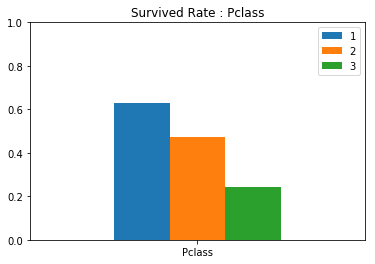

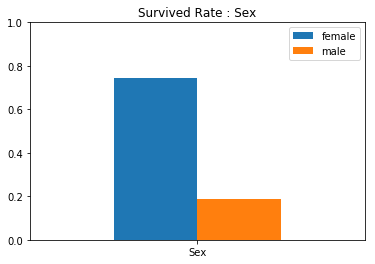

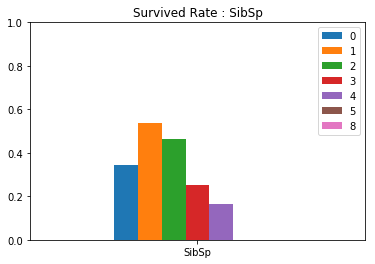

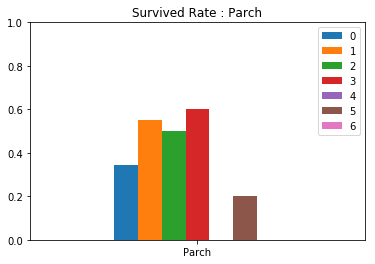

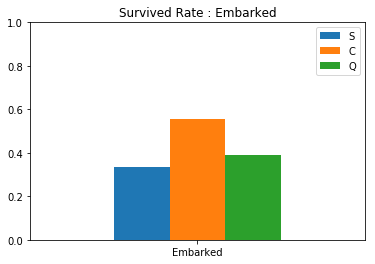

In [633]:
chart_bar('Pclass')
chart_bar('Sex')
chart_bar('SibSp')
chart_bar('Parch')
chart_bar('Embarked')

In [634]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Sex
- According to graph, "Sex" is the main element of survived rate.

In [635]:
train_test_data = [train, test]
for data in train_test_data:
    data.loc[data.Sex == 'male', 'Sex'] = 1
    data.loc[data.Sex == 'female', 'Sex'] = 0
# or
# sex_mapping = {'male' : 1, 'female' : 0}
# for data in train_test_data:
#    data["Sex"] = data["Sex"].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


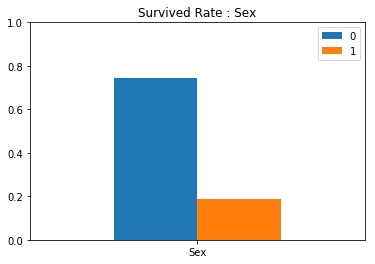

In [636]:
chart_bar("Sex")

## 2. Age
- Age should be a good indicator of survived rate.
- There are several NAN data in the age, so I convert those data to number.
- I assume NaN with 'Name' which include word 'Ms', 'Mr', else.

In [637]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [638]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [639]:
merge_name_age = pd.concat([train[["Name", "Age"]], test[["Name", "Age"]]])
merge_name_age.head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [640]:
merge_name_age["Name"] = merge_name_age["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
merge_name_age.head()

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0


In [641]:
merge_name_age["Name"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Dona          1
Don           1
Lady          1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Countess      1
Name: Name, dtype: int64

In [642]:
print("Mean of 'Mr' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean()), '\n')
print("Mean of 'Miss' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean()), '\n')
print("Mean of 'Mrs' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean()), '\n')
print("Mean of 'Master' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean()), '\n')
print("Mean of else : Mean of numbers after convert upper ages")
Mr_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean())
Miss_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean())
Mrs_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean())
Master_mean =  np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean())

Mean of 'Mr' age :  32.0 

Mean of 'Miss' age :  21.0 

Mean of 'Mrs' age :  36.0 

Mean of 'Master' age :  5.0 

Mean of else : Mean of numbers after convert upper ages


In [643]:
for data in train_test_data:
    data["Name"] = data["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
    for name, mean in zip(['Mr', 'Miss', 'Mrs', 'Master'], [Mr_mean, Miss_mean, Mrs_mean, Master_mean]):
        data[data["Name"] == name]["Age"].fillna(mean, inplace = True)
    data["Age"].fillna(np.floor(data["Age"].mean()), inplace = True)
    data["Age"] = data["Age"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## 3. Name

In [644]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35,0,0,373450,8.0500,NaN,S


In [645]:
print(train_test_data[0]["Name"].unique())
name_mapping = {'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3}
for name in merge_name_age['Name'].value_counts().index[4:]:
    name_mapping.update({'{}'.format(name) : 4})
for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


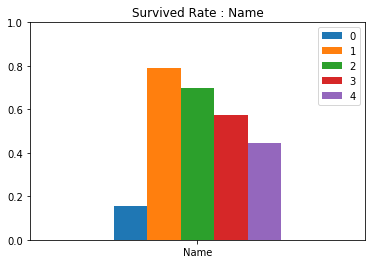

In [646]:
chart_bar('Name')

In [647]:
train_test_data[0].info()
print('\n')
train_test_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

## 4. Pclass

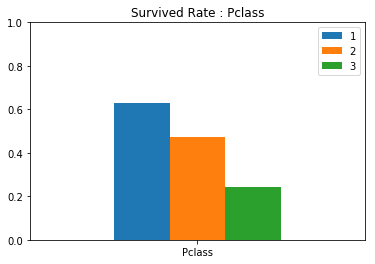

In [653]:
chart_bar('Pclass')

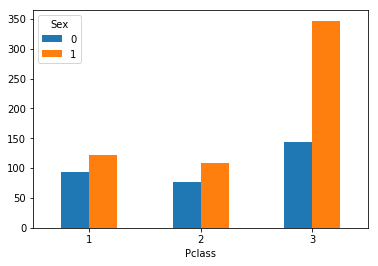

In [693]:
df = pd.DataFrame(train.groupby(['Pclass', 'Sex']).size().unstack())
df.plot(kind = 'bar', rot = 0)